# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

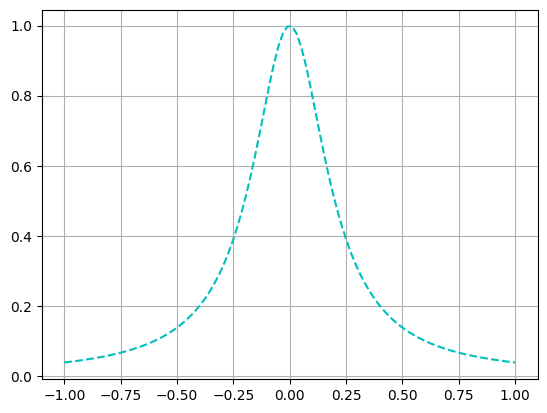

In [87]:
f=lambda x:1/(1+25*(x**2))
x=np.linspace(-1,1,100)
plt.plot(x, f(x), 'c--')
plt.grid()

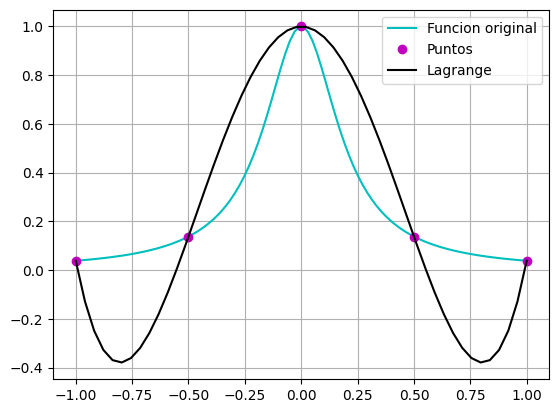

In [88]:
N = 4
n = N + 1
x_ = np.linspace(-1,1,n) #Puntos a interpolar
PL = lagrange(x_,f(x_)) #Función de interpolación
xL = np.linspace(np.min(x_), np.max(x_))
plt.plot(x,f(x),"c-", label = "Funcion original")
plt.plot(x_,f(x_), "mo", label = "Puntos")
plt.plot(xL, PL(xL), "k-", label = "Lagrange")
plt.legend()
plt.grid(True)

In [89]:
x=sp.Symbol('x')
f=lambda x:1/(1+25*(x**2))
df5=sp.diff(f(x),x,5)
f5 = sp.lambdify(x,df5,"numpy")

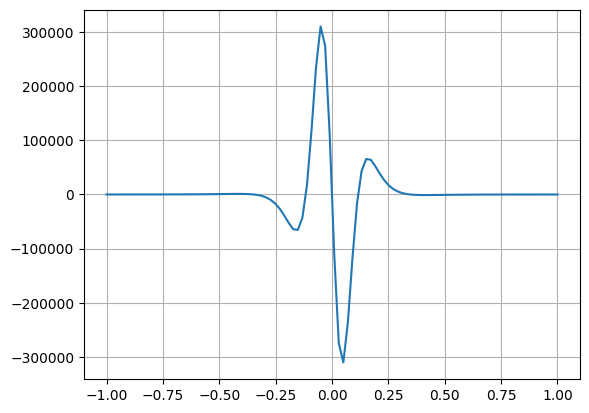

47
-0.050505050505050386


In [90]:
x=np.linspace(-1,1,100)
plt.plot(x,f5(x))
plt.grid(True)
plt.show()
x_max = np.max(abs(f5(x)))
x_zeta = np.argmax(abs(f5(x)))
print(x_zeta)
print(x[x_zeta])

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

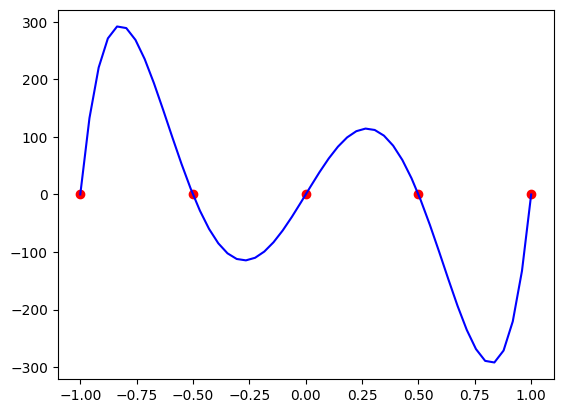

In [91]:
import math as mt
plt.plot(x_,f(x_),"ro")
plt.plot(xL, x_max/(mt.factorial(n))*(xL-x_[0])*(xL-x_[1])*(xL-x_[2])*(xL-x_[3])*(xL-x_[4]), "b-")

In [92]:
xL = np.linspace(np.min(x_), np.max(x_))


In [93]:
def derivadas(n):
  x=sp.Symbol('x')
  f=lambda x:1/(1+25*(x**2))
  D=[]
  for i in range(n):
    dfn = sp.diff(f(x),x,i+1)
    fn = sp.lambdify(x,dfn,"numpy")
    D.append(dfn)
  return D

In [94]:
n = 3  # Número de derivadas que deseas calcular
d= derivadas(n)
d

[-50*x/(25*x**2 + 1)**2,
 50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2,
 15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3]

In [95]:


def epsilon(n, xi, x, x_points):
    epsilon = 1 / np.math.factorial(n+1) * derivadas(n+1, xi)
    for xi_i in x_points:
        epsilon *= (x - xi_i)
    return epsilon

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

In [106]:
g=lambda x:np.tan(x)
xi=np.linspace(-np.pi/4,np.pi/4,1000)#valores para la interpolacion
N = 9
n = N+1
x_g = np.linspace(-np.pi/4, np.pi/4,n)
Pg = lagrange(x_g,g(x_g))
xlg = np.linspace(np.min(x_g), np.max(x_g))


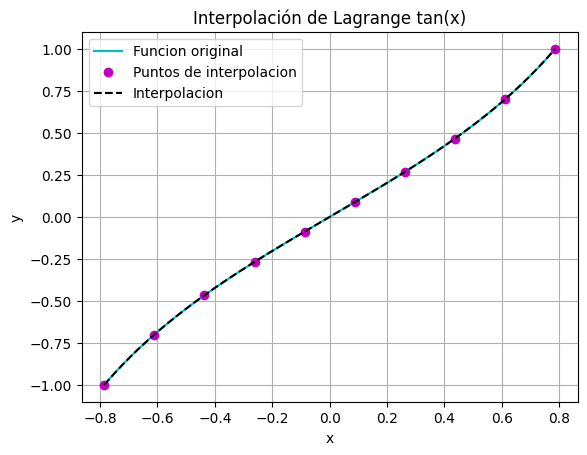

In [97]:
plt.plot(xi, g(xi),"c-",label = "Funcion original") #Función orginal
plt.plot(x_g, g(x_g),"mo",label= "Puntos de interpolacion") #Puntos a interpolar
plt.plot(xlg,Pg(xlg), "k--",label="Interpolacion")
plt.title("Interpolación de Lagrange tan(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)


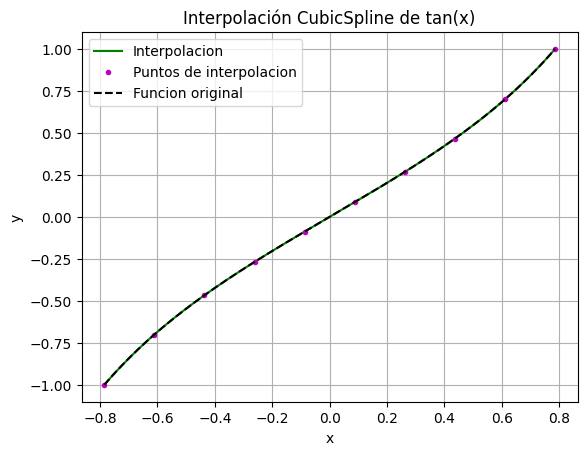

In [98]:
Pc= CubicSpline(x_g,g(x_g))
x1=np.linspace(min(x_g), max(x_g),1000)
xi=np.linspace(-np.pi/4,np.pi/4,1000)
plt.plot(x1, Pc(x1), 'g-', label= 'Interpolacion')
plt.plot(x_g,g(x_g),"m.", label= "Puntos de interpolacion")
plt.plot(xi, g(xi),"k--",label = "Funcion original")
plt.title("Interpolación CubicSpline de tan(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)


In [99]:
g=lambda x:np.tan(x)
xi=np.linspace(-np.pi/4,np.pi/4,1000)#valores para la interpolacion
N = 20
n = N+1
x_g = np.linspace(-np.pi/4, np.pi/4,n)
Pg = lagrange(x_g,g(x_g))
xlg = np.linspace(np.min(x_g), np.max(x_g))

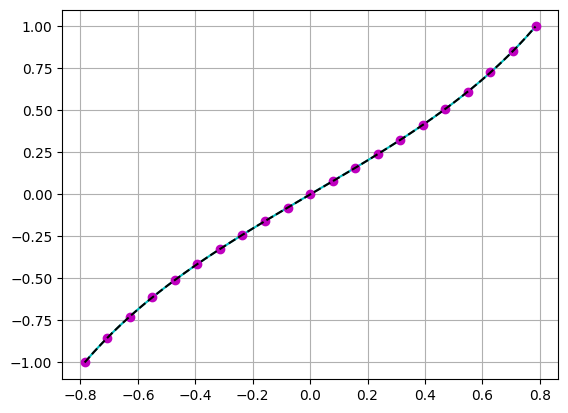

In [100]:
plt.plot(xi, g(xi),"c-") #Función orginal
plt.plot(x_g, g(x_g),"mo") #Puntos a interpolar
plt.plot(xlg,Pg(xlg), "k--")
plt.grid(True)

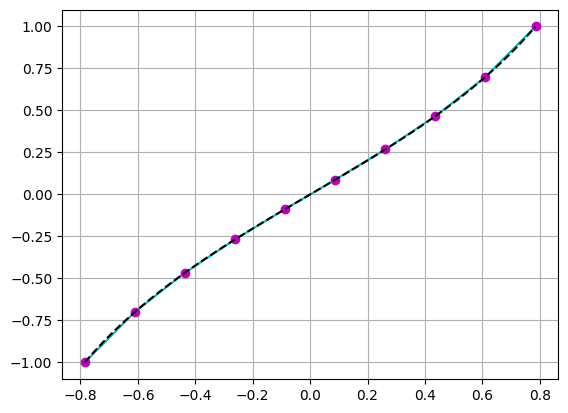

In [101]:
g=lambda x:np.tan(x)
xi=np.linspace(-np.pi/4,np.pi/4,10)#valores para la interpolacion
N = 9
n = N+1
x_g = np.linspace(-np.pi/4, np.pi/4,n)
Pg = lagrange(x_g,g(x_g))
xlg = np.linspace(np.min(x_g), np.max(x_g))
plt.plot(xi, g(xi),"c-") #Función orginal
plt.plot(x_g, g(x_g),"mo") #Puntos a interpolar
plt.plot(xlg,Pg(xlg), "k--")
plt.grid(True)

In [102]:
x=sp.Symbol('x')
g=lambda x:sp.tan(x)
dg=sp.diff(g(x),x,10)
fg= sp.lambdify(x,dg,"numpy")


0
-0.7853981633974483
51733503.999999955


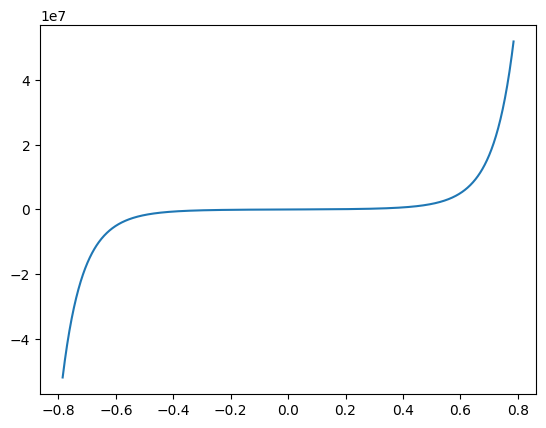

In [103]:
xi=np.linspace(-np.pi/4,np.pi/4,1000)
plt.plot(xi,fg(xi))
xmax=np.max(abs(fg(xi)))
x_zeta = np.argmax(abs(fg(xi)))
print(x_zeta)
print(xi[x_zeta])
print(xmax)

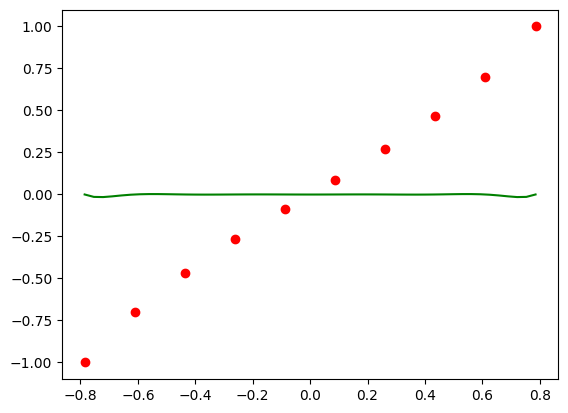

In [107]:
x_g = np.linspace(-np.pi/4, np.pi/4,n)
Pg = lagrange(x_g,g(x_g))
xlg = np.linspace(np.min(x_g), np.max(x_g))

plt.plot(x_g,g(x_g),"ro")
plt.plot(xlg, xmax/(mt.factorial(n))*(xlg-x_g[0])*(xlg-x_g[1])*(xlg-x_g[2])*(xlg-x_g[3])*(xlg-x_g[4])*(xlg-x_g[5])*(xlg-x_g[6])*(xlg-x_g[7])*(xlg-x_g[8])*(xlg-x_g[9]), "g-")

##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


In [108]:
import pandas as pd
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
dicc={'x':x, 'fx':fx}
df=pd.DataFrame(dicc)
Pl =lagrange(x,fx)
new_x_range = np.arange(1.1, 2.1, 0.1)
new_fx_range = Pl(new_x_range)
dicc_lagrange = {"new_x_range":new_x_range, "new_fx_range":new_x_range}

b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

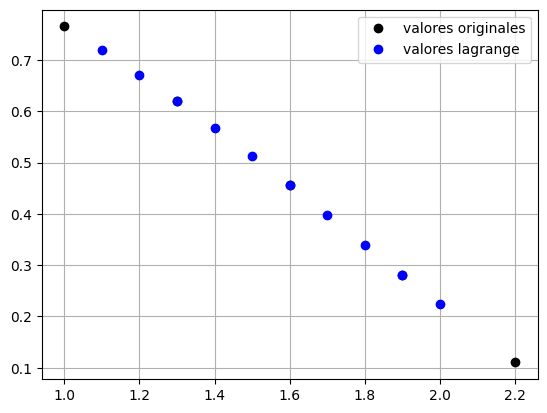

In [111]:
plt.figure()
#plt.plot(new_x_range, new_fx_range,"bo", label='valores lagrange')
plt.plot(x,fx,"ko", label='valores originales')
plt.plot(new_x_range, new_fx_range,"bo", label='valores lagrange')
plt.legend()
plt.grid()
plt.show()

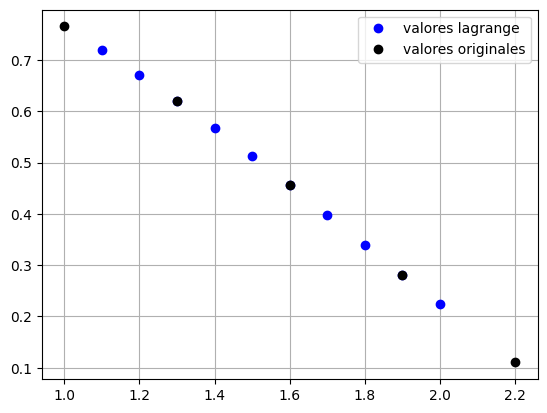

In [110]:
plt.figure()
plt.plot(new_x_range, new_fx_range,"bo", label='valores lagrange')
plt.plot(x,fx,"ko", label='valores originales')
#plt.plot(new_x_range, new_fx_range,"bo", label='valores lagrange')
plt.legend()
plt.grid()
plt.show()

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia.

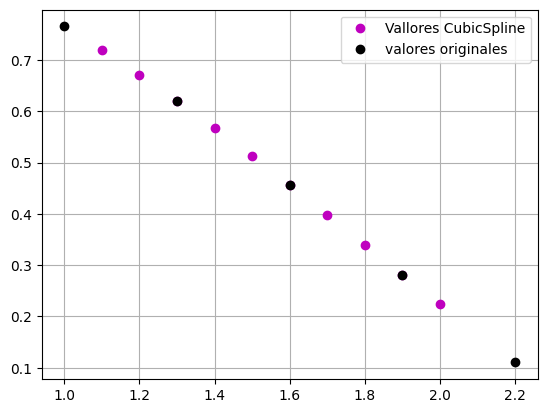

In [112]:
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
cs = CubicSpline(x,fx)
nfx=cs(new_x_range)
plt.plot(new_x_range,nfx,"mo", label="Vallores CubicSpline")
plt.plot(x,fx, 'ko', label='valores originales')
plt.legend()
plt.grid()
plt.show()

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [113]:
import numpy as np
import matplotlib.pyplot as plt
#import sympy as spplt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
x=np.array([0.9,1.3,1.9,2.1,2.6, 3.0, 3.9,4.4,4.7, 5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
y=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4,0.25 ])

(-7.0, 4.0)

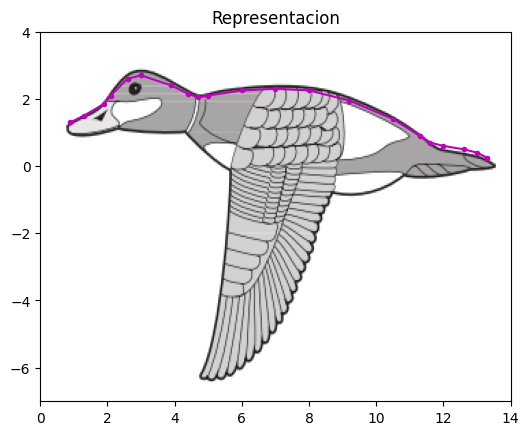

In [114]:
import urllib.request
pato='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')#Decargar la imagen
imagen_pato=plt.imread('pato.jpg') #Variable con la imagen del pato
plt.figure()
plt.title('Representacion')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(x,y,"m.-")
plt.xlim(0,14)
plt.ylim(-7, 4)

(-7.0, 6.0)

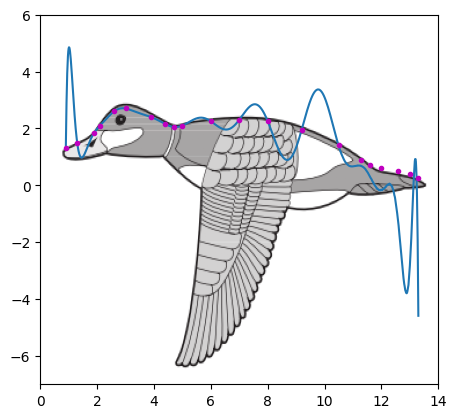

In [115]:
Pl= lagrange(x,y)
x1=np.linspace(min(x), max(x),1000)
plt.plot(x1, Pl(x1))
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(x,y,"m.")
plt.xlim(0,14)
plt.ylim(-7, 6)

(-7.0, 4.0)

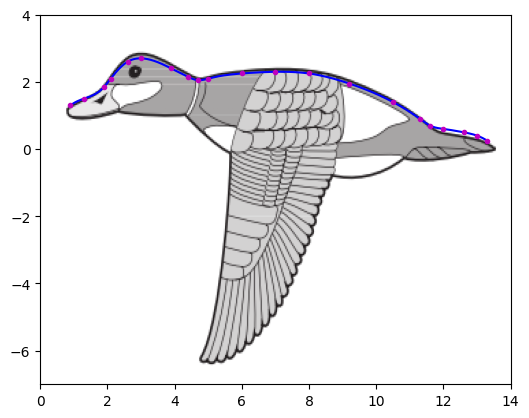

In [116]:
P= CubicSpline(x,y)
x1=np.linspace(min(x), max(x),1000)
plt.plot(x1, P(x1), 'b-')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(x,y,"m.")
plt.xlim(0,14)
plt.ylim(-7, 4)

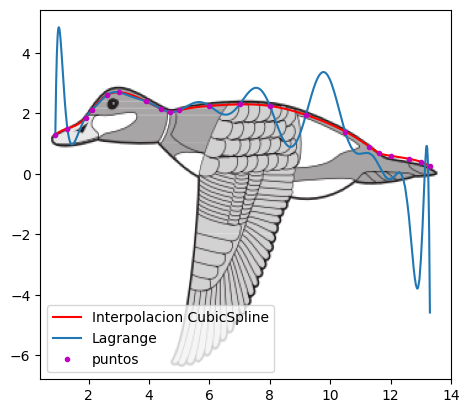

In [117]:
plt.plot(x1, P(x1), 'r-', label='Interpolacion CubicSpline')
plt.plot(x1, Pl(x1), label='Lagrange')
plt.imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
plt.plot(x,y,"m.", label='puntos')

plt.legend()


El método de CubicSpline se ajusta mejor a los datos que la interpolación por el método de Lagrange, esto se debe a que el polinomio de Lagrange puede presentar más errores cuando se aumenta el grado del polinomio, mientras que la interpolación por cubicSpline es un ajuste más suave y estable.